In [67]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import pickle
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.linear_model import Ridge,Lasso,RidgeCV,LassoCV
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score, classification_report
from sklearn.ensemble import ExtraTreesRegressor


import warnings 
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/dsrscientist/dataset1/master/abalone.csv')
df

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...
4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


# Data Cleaning and Visualization

In [3]:
df.shape

(4177, 9)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             4177 non-null   object 
 1   Length          4177 non-null   float64
 2   Diameter        4177 non-null   float64
 3   Height          4177 non-null   float64
 4   Whole weight    4177 non-null   float64
 5   Shucked weight  4177 non-null   float64
 6   Viscera weight  4177 non-null   float64
 7   Shell weight    4177 non-null   float64
 8   Rings           4177 non-null   int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 293.8+ KB


There are no Null Values

In [5]:
df.describe()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684
std,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


In [6]:
df.corr()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
Length,1.000000,0.986812,0.827554,0.925261,0.897914,0.903018,0.897706,0.556720
Diameter,0.986812,1.000000,0.833684,0.925452,0.893162,0.899724,0.905330,0.574660
Height,0.827554,0.833684,1.000000,0.819221,0.774972,0.798319,0.817338,0.557467
Whole weight,0.925261,0.925452,0.819221,1.000000,0.969405,0.966375,0.955355,0.540390
Shucked weight,0.897914,0.893162,0.774972,0.969405,1.000000,0.931961,0.882617,0.420884
Viscera weight,0.903018,0.899724,0.798319,0.966375,0.931961,1.000000,0.907656,0.503819
Shell weight,0.897706,0.905330,0.817338,0.955355,0.882617,0.907656,1.000000,0.627574
Rings,0.556720,0.574660,0.557467,0.540390,0.420884,0.503819,0.627574,1.000000


There is a multi personality problem in the Shucked weight, Viscera weight, Shell weight and Whole weight however we can not drop any column since it affects the accuracy

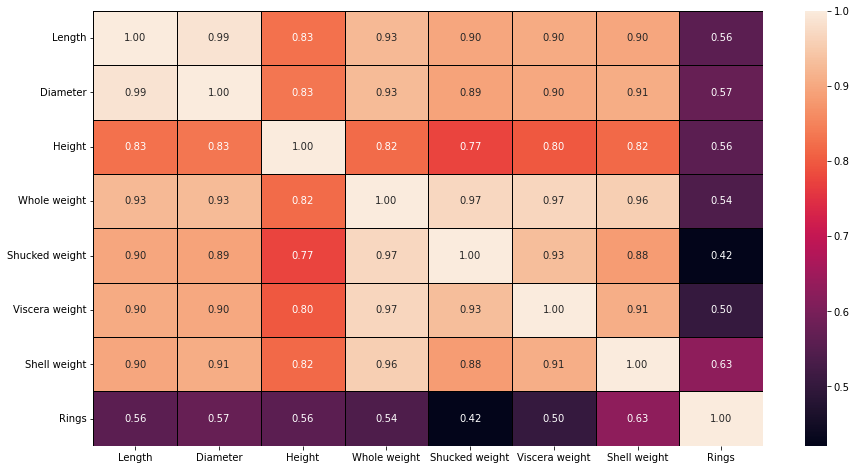

In [7]:
plt.figure(figsize = (15,8))
sns.heatmap(df.corr(),annot=True, linewidths=0.5,linecolor='black',fmt = '.2f')
plt.show()

In [8]:
x = df.drop('Rings',axis=1)
y = df['Rings']

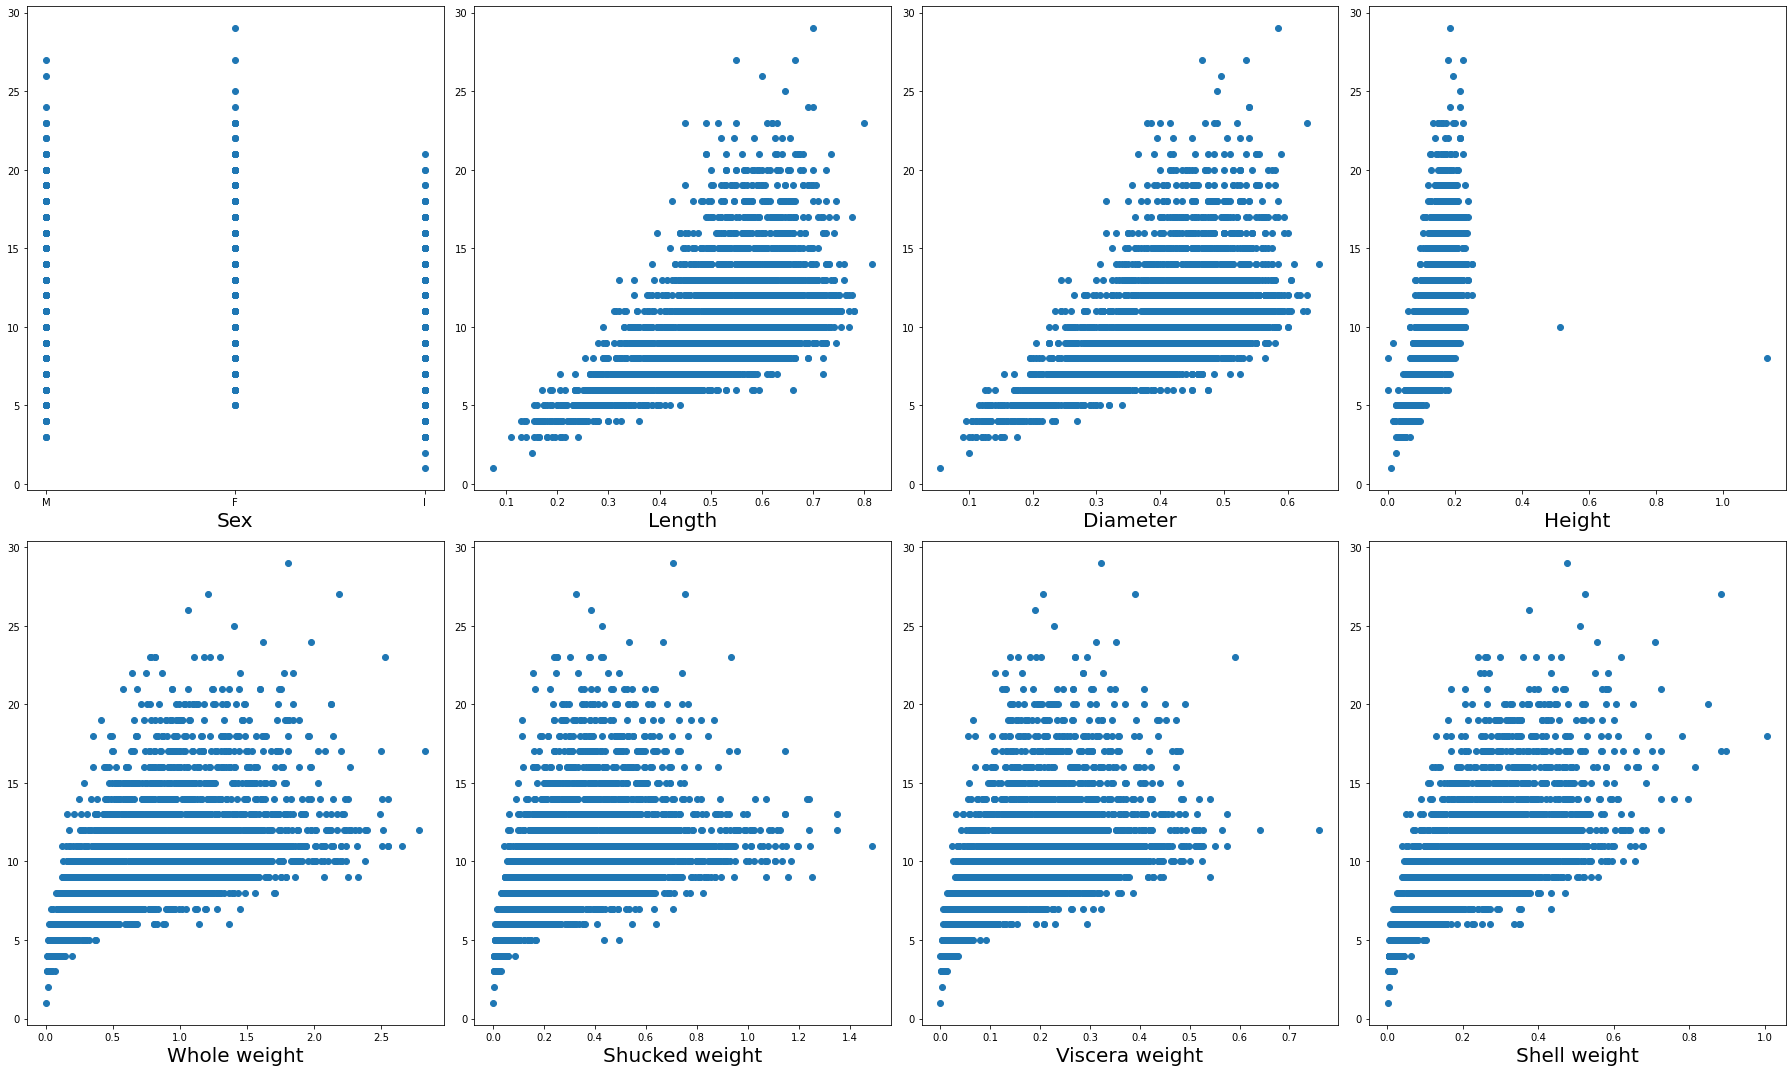

In [9]:
plt.figure(figsize=(25,15), facecolor='white')

plotno = 1

for column in x:
    if plotno <= 8:
        ax = plt.subplot(2,4,plotno)
        plt.scatter(x[column],y)
        plt.xlabel(column,fontsize=20)
        
    plotno+=1
plt.tight_layout()

In [10]:
z = df.drop('Sex',axis=1)

Since the Sex column does not have collinearity with label hence have dropped the column

In [11]:
z

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...
4172,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


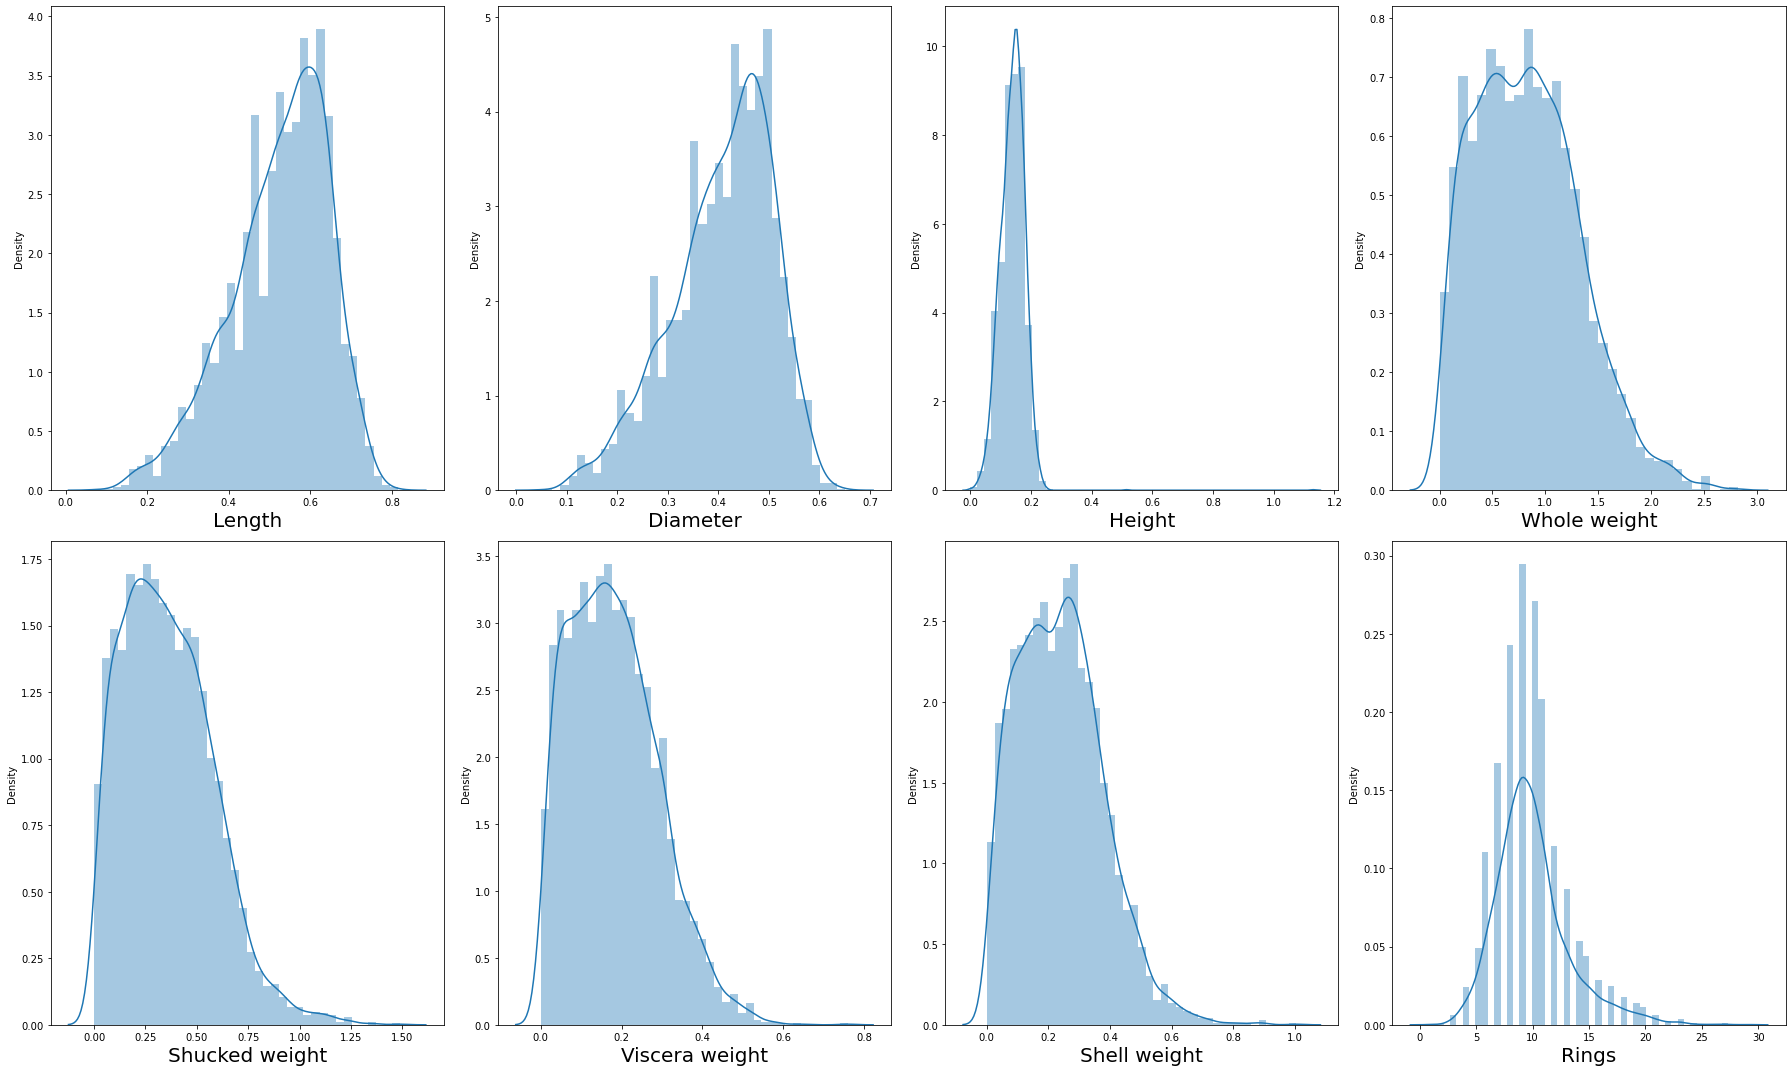

In [12]:
plt.figure(figsize=(25,15), facecolor='white')

plotno = 1

for column in z:
    if plotno <= 8:
        ax = plt.subplot(2,4,plotno)
        sns.distplot(z[column])
        plt.xlabel(column,fontsize=20)
        
    plotno+=1
plt.tight_layout()

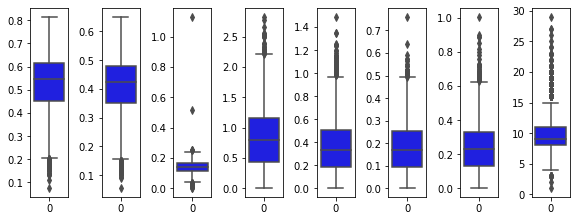

In [13]:
a = z.columns.values
col = 30
row = 14
plt.figure(figsize = (col,3*row))
for i in range(0, len(a)):
    plt.subplot(row,col,i+1)
    sns.boxplot(data = z[a[i]],color='blue',orient='v')
    plt.tight_layout()

Removed Outliers

In [14]:
print('Highest allowed',z['Height'].mean()+3*z['Height'].std())
print('Lowest allowed',z['Height'].mean()-3*z['Height'].std())

Highest allowed 0.26499756915143247
Lowest allowed 0.014035229507890296


In [15]:
z1=z[(z['Height']<0.264)&(z['Height']>0.0140)]
z1

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...
4172,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


In [16]:
z.columns

Index(['Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight',
       'Viscera weight', 'Shell weight', 'Rings'],
      dtype='object')

In [17]:
print('Highest allowed',z['Length'].mean()+3*z['Length'].std())
print('Lowest allowed',z['Length'].mean()-3*z['Length'].std())

Highest allowed 0.8842708372874097
Lowest allowed 0.1637133618986099


In [18]:
z1=z[(z['Length']<0.884)&(z['Length']>0.163)]
z1

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...
4172,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


In [19]:
print('Highest allowed',z['Diameter'].mean()+3*z['Diameter'].std())
print('Lowest allowed',z['Diameter'].mean()-3*z['Diameter'].std())


Highest allowed 0.7056008528898465
Lowest allowed 0.11016165608789152


In [20]:
z1=z[(z['Diameter']<0.705)&(z['Diameter']>0.110)]

In [21]:
print('Highest allowed',z['Whole weight'].mean()+3*z['Whole weight'].std())
print('Lowest allowed',z['Whole weight'].mean()-3*z['Whole weight'].std())

Highest allowed 2.2999092141375717
Lowest allowed -0.6424248952484118


In [22]:
z1=z[(z['Whole weight']<2.299)&(z['Whole weight']>0)]

In [23]:
print('Shucked weight Highest allowed',z['Shucked weight'].mean()+3*z['Shucked weight'].std())
print('Shucked weight Lowest allowed',z['Shucked weight'].mean()-3*z['Shucked weight'].std())
print('Viscera weight Highest allowed',z['Viscera weight'].mean()+3*z['Viscera weight'].std())
print('Viscera weight Lowest allowed',z['Viscera weight'].mean()-3*z['Viscera weight'].std())
print('Shell weight Highest allowed',z['Shell weight'].mean()+3*z['Shell weight'].std())
print('Shell weight Lowest allowed',z['Shell weight'].mean()-3*z['Shell weight'].std())

Shucked weight Highest allowed 1.0252563357278615
Shucked weight Lowest allowed -0.3065213584714594
Viscera weight Highest allowed 0.5094363586315793
Viscera weight Lowest allowed -0.14824914292652724
Shell weight Highest allowed 0.6564388680356752
Shell weight Lowest allowed -0.1787771490986393


In [24]:
z1=z[(z['Shucked weight']<1.025)&(z['Shucked weight']>0)]

In [25]:
z1=z[(z['Viscera weight']<0.509)&(z['Viscera weight']>0)]

In [26]:
z1=z[(z['Shell weight']<0.656)&(z['Shell weight']>0)]

In [27]:
z1

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...
4172,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


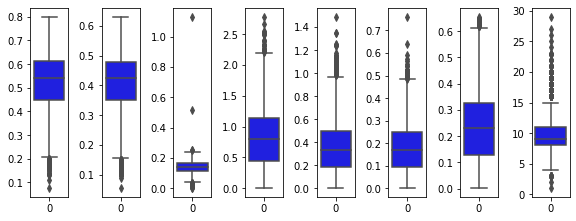

In [28]:
a = z1.columns.values
col = 30
row = 14
plt.figure(figsize = (col,3*row))
for i in range(0, len(a)):
    plt.subplot(row,col,i+1)
    sns.boxplot(data = z1[a[i]],color='blue',orient='v')
    plt.tight_layout()

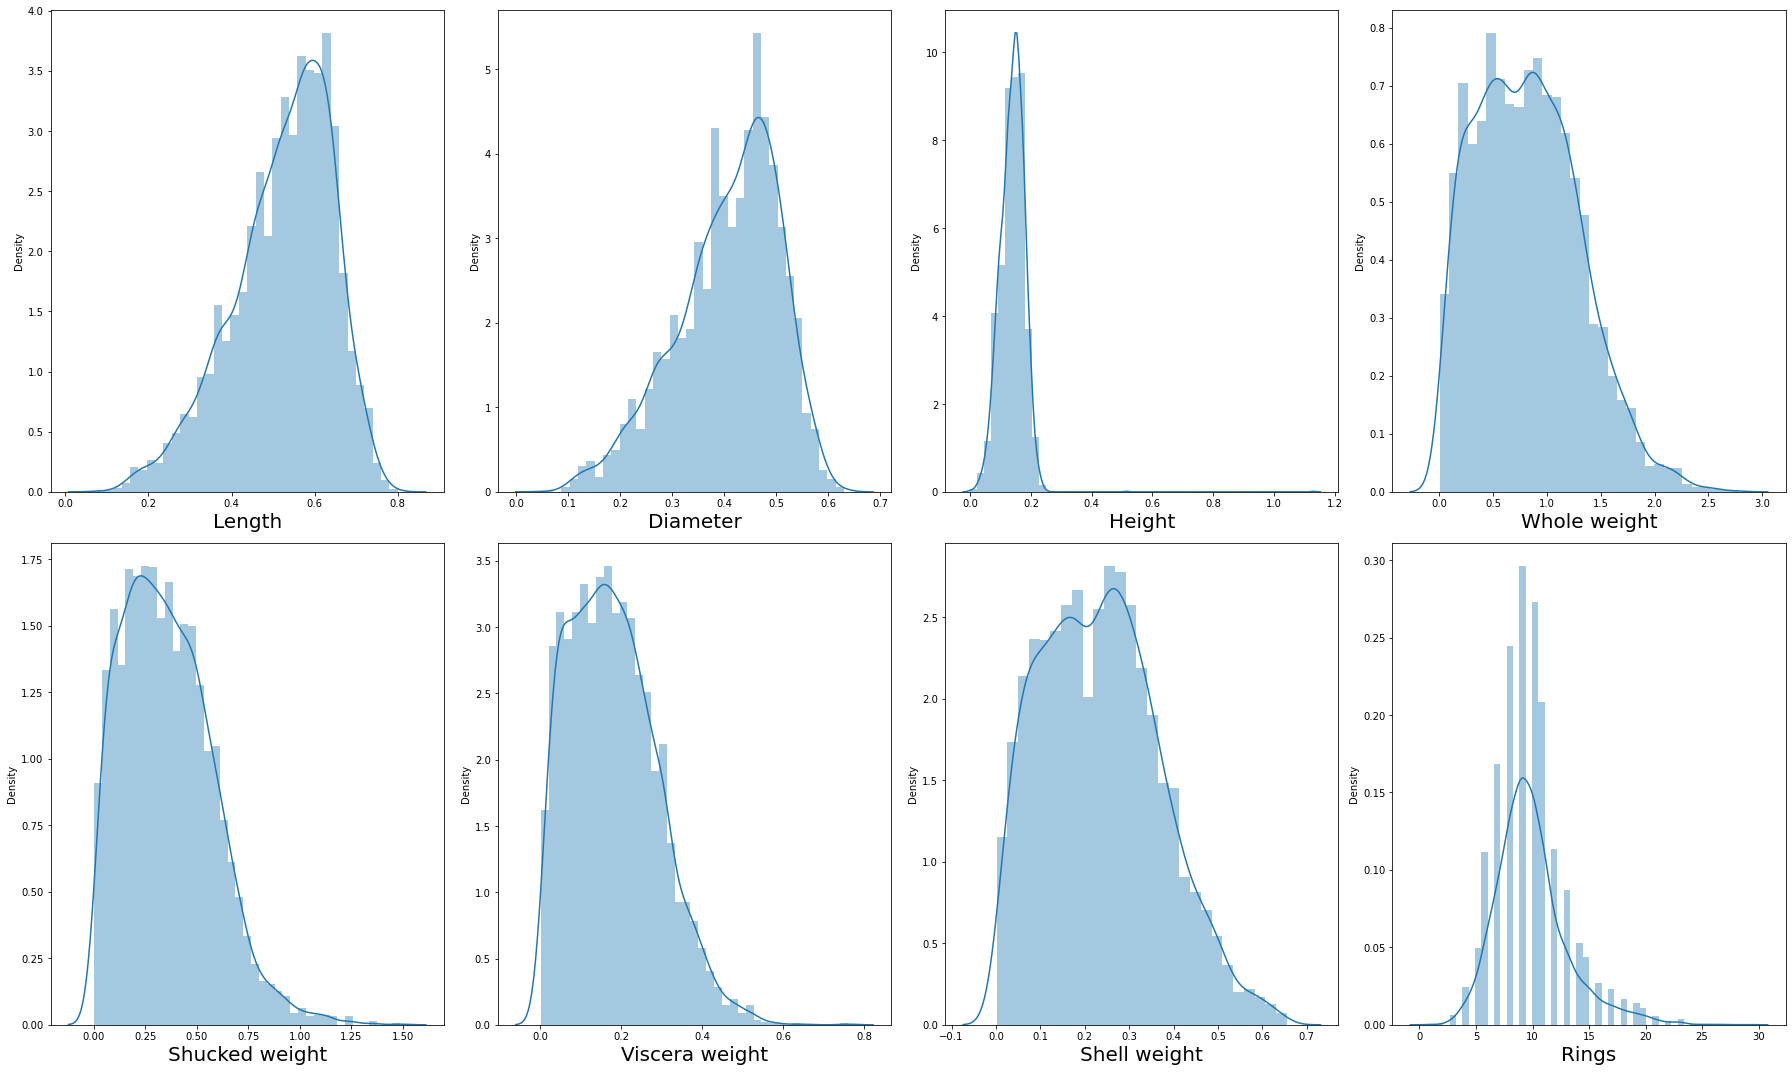

In [29]:
plt.figure(figsize=(25,15), facecolor='white')

plotno = 1

for column in z1:
    if plotno <= 8:
        ax = plt.subplot(2,4,plotno)
        sns.distplot(z1[column])
        plt.xlabel(column,fontsize=20)
        
    plotno+=1
plt.tight_layout()

In [30]:
z1.corr()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
Length,1.000000,0.986728,0.825639,0.927215,0.897503,0.902347,0.909903,0.551982
Diameter,0.986728,1.000000,0.831572,0.927200,0.892567,0.899037,0.917440,0.570322
Height,0.825639,0.831572,1.000000,0.817678,0.772631,0.795946,0.822863,0.550946
Whole weight,0.927215,0.927200,0.817678,1.000000,0.970398,0.967508,0.958604,0.529401
Shucked weight,0.897503,0.892567,0.772631,0.970398,1.000000,0.931307,0.890697,0.411800
Viscera weight,0.902347,0.899037,0.795946,0.967508,0.931307,1.000000,0.916480,0.496098
Shell weight,0.909903,0.917440,0.822863,0.958604,0.890697,0.916480,1.000000,0.617486
Rings,0.551982,0.570322,0.550946,0.529401,0.411800,0.496098,0.617486,1.000000


In [31]:
z1 = z1.drop('Height',axis=1)

Height does not affect the dataset hence removed

# LinearRegression

In [32]:
x = z1.drop('Rings',axis=1)
y = z1['Rings']

In [33]:
scaler = StandardScaler()
X_scale = scaler.fit_transform(x)
reg= LinearRegression()

In [34]:
for i in range(0,100):
    x_train,x_test,y_train,y_test = train_test_split(X_scale,y,test_size = 0.25,random_state = i)
    reg.fit(x_train, y_train)
    x_pred = reg.predict(x_train)
    y_pred = reg.predict(x_test)
    print("At Random state", (i), "the training accuracy is :-", (r2_score (y_train,x_pred)))
    print("At Random state", (i), "the testing accuracy is :-", (r2_score (y_test,y_pred)))
    print('\n')

At Random state 0 the training accuracy is :- 0.5155119240276027
At Random state 0 the testing accuracy is :- 0.5129525894227291


At Random state 1 the training accuracy is :- 0.5152073963432164
At Random state 1 the testing accuracy is :- 0.5140569947597333


At Random state 2 the training accuracy is :- 0.5193615346671001
At Random state 2 the testing accuracy is :- 0.5008593702337978


At Random state 3 the training accuracy is :- 0.5223272784712504
At Random state 3 the testing accuracy is :- 0.4917050988304773


At Random state 4 the training accuracy is :- 0.5202969577702127
At Random state 4 the testing accuracy is :- 0.49835988364596595


At Random state 5 the training accuracy is :- 0.5128333398827909
At Random state 5 the testing accuracy is :- 0.5188841563260316


At Random state 6 the training accuracy is :- 0.5155661175065689
At Random state 6 the testing accuracy is :- 0.5112042647160937


At Random state 7 the training accuracy is :- 0.5023520206372731
At Random state 7

In [35]:
x_train,x_test,y_train,y_test = train_test_split(X_scale,y,test_size = 0.25,random_state = 57)

In [36]:
reg.score(x_train, y_train)

0.5125931670473132

In [37]:
y_pred = reg.predict(x_test)

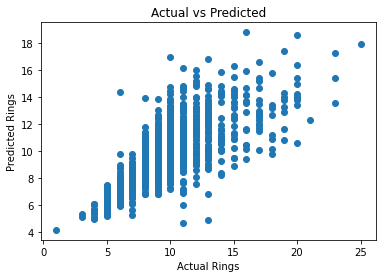

In [38]:
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Rings')
plt.ylabel('Predicted Rings')
plt.title('Actual vs Predicted')
plt.show()

In [39]:
mean_squared_error (y_test,y_pred)

4.634840840109384

In [40]:
mean_absolute_error(y_test,y_pred)

1.5670563888315368

In [41]:
r2_score (y_test,y_pred)

0.5191450137680551

Regularization

In [42]:
Lassocv = LassoCV(alphas = None, max_iter = 100, normalize = True)
Lassocv.fit(x_train, y_train)
alpha = Lassocv.alpha_
lasso_reg = Lasso(alpha)
lasso_reg.fit(x_train, y_train)
lasso_reg.score(x_test, y_test)

0.5203347055344978

In [43]:
rdgcv = RidgeCV(alphas = np.arange(0.001,0.1,0.01),normalize = True)
rdgcv.fit(x_train, y_train)
rd_model = Ridge(alpha=rdgcv.alpha_)
rd_model.fit(x_train, y_train)
rd_model.score(x_test, y_test)

0.5203146251625744

- Train data accurancy score is 51.25%
- Test data accurancy score is 51.91%
- Lasso model accurancy score is 52.03%
- Ridge model accurancy score is 52.03%

# DecisionTreeClassifier

In [44]:
x_train,x_test,y_train,y_test = train_test_split(X_scale,y,test_size = 0.25,random_state = 77)

In [45]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier()
clf.fit(x_train,y_train)

DecisionTreeClassifier()

In [46]:
clf.score(x_train,y_train)

1.0

In [47]:
y_pred = clf.predict(x_test)

In [48]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.18786127167630057

# Hyper Tuning

In [49]:
grid_param = {
    'criterion': ['gini','entropy'],
    'max_depth': range(10,20),
    'min_samples_leaf':range(2,15),
    'min_samples_split':range(3,15),
    'max_leaf_nodes':range(2,6)
}

In [50]:
from sklearn.model_selection import GridSearchCV
grid_search = GridSearchCV(estimator=clf,
                          param_grid=grid_param,
                          cv=10,
                          n_jobs =-1)

In [51]:
grid_search.fit(x_train,y_train)

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(10, 20),
                         'max_leaf_nodes': range(2, 6),
                         'min_samples_leaf': range(2, 15),
                         'min_samples_split': range(3, 15)})

In [52]:
best_parameters = grid_search.best_params_
print(best_parameters)

{'criterion': 'entropy', 'max_depth': 10, 'max_leaf_nodes': 5, 'min_samples_leaf': 2, 'min_samples_split': 3}


In [53]:
clf = DecisionTreeClassifier(criterion= 'gini', max_depth= 10, min_samples_leaf= 2, min_samples_split= 3)
clf.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=10, min_samples_leaf=2, min_samples_split=3)

In [54]:
y_pred = clf.predict(x_test)
accuracy_score(y_test,y_pred)

0.23699421965317918

In [55]:
clf.score(x_train,y_train)

0.5125321336760925

- Train data accurancy score is 51.47%
- Test data accurancy score is 23.69%

# AdaBoost Model 

In [58]:
x_train,x_test,y_train,y_test = train_test_split(X_scale,y,test_size = 0.25,random_state = 77)

In [59]:
from sklearn.ensemble import AdaBoostRegressor
from sklearn import metrics
from sklearn.model_selection import RandomizedSearchCV

In [61]:
ada = AdaBoostRegressor()
ada.fit(x_train, y_train)
y_pred = ada.predict(x_test) 
metrics.r2_score(y_test, y_pred)

0.23172258190490536

# GradientBoostingClassifier

In [65]:
from sklearn.ensemble import GradientBoostingClassifier
x_train,x_test,y_train,y_test = train_test_split(X_scale,y,test_size = 0.25,random_state = 25)

In [68]:
gbdt = GradientBoostingClassifier()
gbdt.fit(x_train, y_train)
y_pred = gbdt.predict(x_test)


clf_report = pd.DataFrame(classification_report(y_test,y_pred, output_dict=True))


In [69]:
clf_report.T

,precision,recall,f1-score,support
3,0.000000,0.000000,0.000000,4.000000
4,0.333333,0.400000,0.363636,15.000000
5,0.344828,0.322581,0.333333,31.000000
6,0.314286,0.360656,0.335878,61.000000
7,0.344262,0.432990,0.383562,97.000000
8,0.280822,0.301471,0.290780,136.000000
9,0.284211,0.331288,0.305949,163.000000
10,0.261905,0.323529,0.289474,170.000000
11,0.260870,0.234375,0.246914,128.000000
12,0.125000,0.054795,0.076190,73.000000


In [70]:
accuracy_score(y_test,y_pred)

0.26011560693641617

# Conclusion

- LinearRegression accuracy score 52.03%
- GradientBoostingClassifier accuracy score 26.01%
- DecisionTreeClassifier accuracy score 23.69%
- AdaBoost Model accuracy score 23.17%

Considering the accuracy score of 52.03% we can choose LinearRegression model

# Saving the Model

In [71]:
import pickle
file = 'Abalone_Case_Study.pickle'
pickle.dump(reg, open(file, 'wb'))